In [1]:
#strateji-1
import pandas as pd

# CSV dosyalarının listesini oluşturalım
csv_files = [
    '/Users/fatihbayazit/vscode/YAP471/BIST30/AKBNK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ALARK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ARCLK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ASELS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/BIMAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EKGYO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ENKAI.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EREGL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/FROTO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GARAN.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GUBRF.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/HEKTS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ISCTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KCHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KONTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KOZAL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KRDMD.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ODAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/OYAKC.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PETKM.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PGSUS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SAHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SASA.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SISE.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TCELL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/THYAO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TOASO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TUPRS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/YKBNK.IS.csv'
]

# Her bir CSV dosyasını yükleyip birleştirme işlemi
dataframes = {file.split('/')[-1].split('.')[0]: pd.read_csv(file, index_col='Date', parse_dates=True) for file in csv_files}

# Tüm DataFrame'lerin 'Adj Close' değerlerini içeren konsolide bir DataFrame oluşturuyoruz
corrected_combined_df = pd.DataFrame()

for stock, df in dataframes.items():
    corrected_combined_df[stock] = df['Adj Close']

# Fonksiyonlarımız
def calculate_annual_return(data):
    return data.pct_change().mean() * 252

def calculate_annual_std(data):
    return data.pct_change().std() * (252 ** 0.5)

def calculate_max_drawdown(data):
    cumulative_returns = (1 + data.pct_change()).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns / peak) - 1
    return drawdown.min()

def calculate_sharpe_ratio(data, risk_free_rate=0):
    return (calculate_annual_return(data) - risk_free_rate) / calculate_annual_std(data)

# Yıllık analizi gerçekleştirme
results = []

for year in range(2014, 2024):
    yearly_data = corrected_combined_df[corrected_combined_df.index.year == year]

    # Eşit ağırlıklı portföy getirisi
    portfolio_return = calculate_annual_return(yearly_data.mean(axis=1))
    
    # Portföy standart sapması
    portfolio_std = calculate_annual_std(yearly_data.mean(axis=1))
    
    # Maksimum çekilme
    max_drawdown = calculate_max_drawdown(yearly_data.mean(axis=1))
    
    # Sharpe Oranı
    sharpe_ratio = calculate_sharpe_ratio(yearly_data.mean(axis=1))
    
    results.append({
        "Year": year,
        "Annual Return": portfolio_return,
        "Standard Deviation": portfolio_std,
        "Max Drawdown": max_drawdown,
        "Sharpe Ratio": sharpe_ratio
    })

# Sonuçları DataFrame'e dönüştürelim
results_df = pd.DataFrame(results)
print(results_df)

'''
# Yıllık korelasyon matrisi hesaplama
annual_correlation_matrices = {}

for year in range(2014, 2024):
    yearly_data = corrected_combined_df[corrected_combined_df.index.year == year]
    annual_correlation_matrices[year] = yearly_data.pct_change().corr()

# Örnek olarak 2020 yılının korelasyon matrisini gösterelim
print(annual_correlation_matrices[2020])
'''

   Year  Annual Return  Standard Deviation  Max Drawdown  Sharpe Ratio
0  2014       0.412260            0.173284     -0.104166      2.379100
1  2015      -0.120746            0.204197     -0.179094     -0.591320
2  2016       0.116729            0.196540     -0.182636      0.593920
3  2017       0.517688            0.150102     -0.089477      3.448901
4  2018      -0.150708            0.213291     -0.218512     -0.706584
5  2019       0.465397            0.201888     -0.166123      2.305226
6  2020       0.433784            0.290640     -0.363268      1.492513
7  2021       0.422555            0.303768     -0.237688      1.391044
8  2022       1.207099            0.303805     -0.105473      3.973270
9  2023       0.362859            0.419298     -0.240541      0.865397


'\n# Yıllık korelasyon matrisi hesaplama\nannual_correlation_matrices = {}\n\nfor year in range(2014, 2024):\n    yearly_data = corrected_combined_df[corrected_combined_df.index.year == year]\n    annual_correlation_matrices[year] = yearly_data.pct_change().corr()\n\n# Örnek olarak 2020 yılının korelasyon matrisini gösterelim\nprint(annual_correlation_matrices[2020])\n'

In [2]:
#strateji-2
import pandas as pd
import numpy as np
# CSV dosyalarının listesini oluşturalım
csv_files = [
    '/Users/fatihbayazit/vscode/YAP471/BIST30/AKBNK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ALARK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ARCLK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ASELS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/BIMAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EKGYO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ENKAI.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EREGL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/FROTO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GARAN.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GUBRF.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/HEKTS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ISCTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KCHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KONTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KOZAL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KRDMD.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ODAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/OYAKC.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PETKM.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PGSUS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SAHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SASA.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SISE.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TCELL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/THYAO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TOASO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TUPRS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/YKBNK.IS.csv'
]

# Her bir CSV dosyasını yükleyip birleştirme işlemi
dataframes = {file.split('/')[-1].split('.')[0]: pd.read_csv(file, index_col='Date', parse_dates=True) for file in csv_files}

# 'Adj Close' değerlerini içeren konsolide bir DataFrame oluşturuyoruz
combined_df = pd.DataFrame()
for stock, df in dataframes.items():
    combined_df[stock] = df['Adj Close']

# En iyi performans gösteren hisseyi bulup bir sonraki yıl tutma stratejisi
best_stock_returns = []

for year in range(2014, 2023):  # 2023 için veri yok, çünkü bir sonraki yılın getirisine bakmamız gerekiyor
    previous_year_data = combined_df[combined_df.index.year == year]
    previous_year_return = previous_year_data.pct_change(fill_method=None).mean()
    
    best_stock = previous_year_return.idxmax()
    
    next_year_data = combined_df[combined_df.index.year == year + 1]
    next_year_return = next_year_data[best_stock].pct_change(fill_method=None).mean() * 252
    
    best_stock_returns.append({
        "Year": year + 1,
        "Best Stock": best_stock,
        "Return": next_year_return
    })

# Standart sapma ve Sharpe oranı için ek hesaplamalar
for item in best_stock_returns:
    year = item["Year"]
    stock = item["Best Stock"]
    
    # Yıl içi veriler
    yearly_data = combined_df[combined_df.index.year == year]
    stock_prices = yearly_data[stock]

    # Yıllık standart sapma hesaplama
    yearly_std = stock_prices.pct_change().std() * np.sqrt(252)
    
    # Sharpe oranı hesaplama (risk-free rate varsayılan olarak 0 olarak alındı)
    sharpe_ratio = item["Return"] / yearly_std if yearly_std != 0 else np.nan

    item["Std Dev"] = yearly_std
    item["Sharpe Ratio"] = sharpe_ratio

    # Maksimum Drawdown hesaplama
    rolling_max = stock_prices.cummax()
    daily_drawdown = stock_prices / rolling_max - 1.0
    max_drawdown = daily_drawdown.cummin().min()
    
    item["Max Drawdown"] = max_drawdown

# Sonuçları göster
best_stock_returns_df = pd.DataFrame(best_stock_returns)
print(best_stock_returns_df)


   Year Best Stock    Return   Std Dev  Sharpe Ratio  Max Drawdown
0  2015      KRDMD -0.493282  0.331397     -1.488493     -0.468509
1  2016      ASELS  0.433988  0.254452      1.705578     -0.126182
2  2017       SASA  1.703495  0.591741      2.878787     -0.336892
3  2018       SASA  0.219336  0.601768      0.364487     -0.333333
4  2019      KOZAL  0.430853  0.325349      1.324282     -0.311017
5  2020      PGSUS  0.096810  0.690646      0.140173     -0.723865
6  2021      KONTR  1.215304  0.730690      1.663228     -0.516311
7  2022      HEKTS  2.419866  0.686607      3.524380     -0.317463
8  2023      KONTR  0.541498  0.731696      0.740060     -0.457813


In [3]:
#strateji-3
import pandas as pd
import numpy as np

# CSV dosyalarının listesini oluşturalım
csv_files = [
    '/Users/fatihbayazit/vscode/YAP471/BIST30/AKBNK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ALARK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ARCLK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ASELS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/BIMAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EKGYO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ENKAI.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EREGL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/FROTO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GARAN.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GUBRF.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/HEKTS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ISCTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KCHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KONTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KOZAL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KRDMD.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ODAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/OYAKC.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PETKM.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PGSUS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SAHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SASA.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SISE.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TCELL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/THYAO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TOASO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TUPRS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/YKBNK.IS.csv'
]

# Her bir CSV dosyasını yükleyip birleştirme işlemi
dataframes = {file.split('/')[-1].split('.')[0]: pd.read_csv(file, index_col='Date', parse_dates=True) for file in csv_files}

# Tüm DataFrame'lerin 'Adj Close' değerlerini içeren konsolide bir DataFrame oluşturuyoruz
corrected_combined_df = pd.DataFrame()

for stock, df in dataframes.items():
    corrected_combined_df[stock] = df['Adj Close']



# En kötü performans gösteren hisseyi bulup bir sonraki yıl tutma stratejisi
worst_stock_returns = []

for year in range(2014, 2023):  # 2023 için veri yok, çünkü bir sonraki yılın getirisine bakmamız gerekiyor
    previous_year_data = corrected_combined_df[corrected_combined_df.index.year == year]
    previous_year_return = previous_year_data.pct_change(fill_method=None).mean()
    
    worst_stock = previous_year_return.idxmin()
    
    next_year_data = corrected_combined_df[corrected_combined_df.index.year == year + 1]
    next_year_return = next_year_data[worst_stock].pct_change(fill_method=None).mean() * 252
    
    worst_stock_returns.append({
        "Year": year + 1,
        "Worst Stock": worst_stock,
        "Return": next_year_return
    })

# Standart sapma ve Sharpe oranı için ek hesaplamalar
for item in worst_stock_returns:
    year = item["Year"]
    stock = item["Worst Stock"]
    
    # Yıl içi veriler
    yearly_data = corrected_combined_df[corrected_combined_df.index.year == year]
    stock_prices = yearly_data[stock]

    # Yıllık standart sapma hesaplama
    yearly_std = stock_prices.pct_change().std() * np.sqrt(252)
    
    # Sharpe oranı hesaplama (risk-free rate varsayılan olarak 0 olarak alındı)
    sharpe_ratio = item["Return"] / yearly_std if yearly_std != 0 else np.nan

    item["Std Dev"] = yearly_std
    item["Sharpe Ratio"] = sharpe_ratio

    # Maksimum Drawdown hesaplama
    rolling_max = stock_prices.cummax()
    daily_drawdown = stock_prices / rolling_max - 1.0
    max_drawdown = daily_drawdown.cummin().min()
    
    item["Max Drawdown"] = max_drawdown

# Sonuçları göster
worst_stock_returns_df = pd.DataFrame(worst_stock_returns)
print(worst_stock_returns_df)


   Year Worst Stock    Return   Std Dev  Sharpe Ratio  Max Drawdown
0  2015       ENKAI -0.021370  0.232477     -0.091923     -0.211003
1  2016       PGSUS -0.160341  0.313285     -0.511804     -0.389103
2  2017       THYAO  1.179643  0.343040      3.438787     -0.194842
3  2018       EKGYO -0.471044  0.331445     -1.421183     -0.430807
4  2019        ODAS  0.514943  0.510642      1.008423     -0.450237
5  2020       ASELS  0.629516  0.423642      1.485965     -0.315547
6  2021       TUPRS  0.421263  0.382888      1.100224     -0.307319
7  2022        ODAS  2.276712  0.583383      3.902605     -0.178687
8  2023       EREGL  0.066268  0.472667      0.140201     -0.409948


In [4]:
#strateji-4
import pandas as pd
import numpy as np

# CSV dosyalarının listesini oluşturalım
csv_files = [
    '/Users/fatihbayazit/vscode/YAP471/BIST30/AKBNK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ALARK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ARCLK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ASELS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/BIMAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EKGYO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ENKAI.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EREGL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/FROTO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GARAN.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GUBRF.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/HEKTS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ISCTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KCHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KONTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KOZAL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KRDMD.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ODAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/OYAKC.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PETKM.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PGSUS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SAHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SASA.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SISE.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TCELL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/THYAO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TOASO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TUPRS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/YKBNK.IS.csv'
]

# Her bir CSV dosyasını yükleyip birleştirme işlemi
dataframes = {file.split('/')[-1].split('.')[0]: pd.read_csv(file, index_col='Date', parse_dates=True) for file in csv_files}

# Tüm DataFrame'lerin 'Adj Close' değerlerini içeren konsolide bir DataFrame oluşturuyoruz
corrected_combined_df = pd.DataFrame()

for stock, df in dataframes.items():
    corrected_combined_df[stock] = df['Adj Close']

# En iyi performans gösteren üç hisseyi bulup bir sonraki yıl tutma stratejisi
top3_stock_returns = []

for year in range(2014, 2023):  # 2023 için veri yok, çünkü bir sonraki yılın getirisine bakmamız gerekiyor
    previous_year_data = corrected_combined_df[corrected_combined_df.index.year == year]
    previous_year_return = previous_year_data.pct_change(fill_method=None).mean()
    
    top3_stocks = previous_year_return.nlargest(3).index.tolist()
    
    next_year_data = corrected_combined_df[corrected_combined_df.index.year == year + 1]
    next_year_returns = next_year_data[top3_stocks].pct_change(fill_method=None).mean(axis=1) * 252
    
    top3_stock_returns.append({
        "Year": year + 1,
        "Top 3 Stocks": top3_stocks,
        "Return": next_year_returns.mean()
    })

# Standart sapma, maksimum drawdown ve Sharpe oranı için ek hesaplamalar
for item in top3_stock_returns:
    year = item["Year"]
    stocks = item["Top 3 Stocks"]
    
    # Yıl içi veriler
    yearly_data = corrected_combined_df[corrected_combined_df.index.year == year]
    stock_prices = yearly_data[stocks]

    # Yıllık standart sapma hesaplama
    yearly_std = stock_prices.pct_change().std(axis=0).mean() * np.sqrt(252)
    
    # Sharpe oranı hesaplama (risk-free rate varsayılan olarak 0 olarak alındı)
    sharpe_ratio = item["Return"] / yearly_std if yearly_std != 0 else np.nan

    item["Std Dev"] = yearly_std
    item["Sharpe Ratio"] = sharpe_ratio

    # Maksimum Drawdown hesaplama
    rolling_max = stock_prices.cummax()
    daily_drawdown = stock_prices / rolling_max - 1.0
    max_drawdown = daily_drawdown.min().min()
    
    item["Max Drawdown"] = max_drawdown

# Sonuçları göster
top3_stock_returns_df = pd.DataFrame(top3_stock_returns)
print(top3_stock_returns_df)


   Year           Top 3 Stocks    Return   Std Dev  Sharpe Ratio  Max Drawdown
0  2015   [KRDMD, SISE, EREGL] -0.229360  0.318594     -0.719912     -0.468509
1  2016  [ASELS, TOASO, TUPRS]  0.301032  0.275615      1.092217     -0.266103
2  2017   [SASA, EREGL, ARCLK]  0.854878  0.375631      2.275846     -0.336892
3  2018   [SASA, THYAO, KRDMD]  0.028391  0.516694      0.054947     -0.584466
4  2019   [KOZAL, HEKTS, SISE]  0.442556  0.328378      1.347704     -0.402059
5  2020  [PGSUS, GUBRF, ALARK]  1.019597  0.609347      1.673261     -0.723865
6  2021   [KONTR, GUBRF, ODAS]  0.214840  0.565423      0.379964     -0.593581
7  2022   [HEKTS, SASA, KONTR]  2.265447  0.662811      3.417936     -0.439077
8  2023   [KONTR, HEKTS, ODAS] -0.017668  0.662202     -0.026681     -0.583045


In [5]:
#strateji-5
import pandas as pd
import numpy as np
# CSV dosyalarının listesini oluşturalım
csv_files = [
    '/Users/fatihbayazit/vscode/YAP471/BIST30/AKBNK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ALARK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ARCLK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ASELS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/BIMAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EKGYO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ENKAI.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EREGL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/FROTO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GARAN.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GUBRF.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/HEKTS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ISCTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KCHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KONTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KOZAL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KRDMD.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ODAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/OYAKC.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PETKM.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PGSUS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SAHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SASA.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SISE.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TCELL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/THYAO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TOASO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TUPRS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/YKBNK.IS.csv'
]

# Her bir CSV dosyasını yükleyip birleştirme işlemi
dataframes = {file.split('/')[-1].split('.')[0]: pd.read_csv(file, index_col='Date', parse_dates=True) for file in csv_files}

# Tüm DataFrame'lerin 'Adj Close' değerlerini içeren konsolide bir DataFrame oluşturuyoruz
corrected_combined_df = pd.DataFrame()

for stock, df in dataframes.items():
    corrected_combined_df[stock] = df['Adj Close']



# En kötü performans gösteren üç hisseyi bulup bir sonraki yıl tutma stratejisi
bottom3_stock_returns = []

for year in range(2014, 2023):  # 2023 için veri yok, çünkü bir sonraki yılın getirisine bakmamız gerekiyor
    previous_year_data = corrected_combined_df[corrected_combined_df.index.year == year]
    previous_year_return = previous_year_data.pct_change(fill_method=None).mean()
    
    bottom3_stocks = previous_year_return.nsmallest(3).index.tolist()
    
    next_year_data = corrected_combined_df[corrected_combined_df.index.year == year + 1]
    next_year_returns = next_year_data[bottom3_stocks].pct_change(fill_method=None).mean(axis=1) * 252
    
    bottom3_stock_returns.append({
        "Year": year + 1,
        "Bottom 3 Stocks": bottom3_stocks,
        "Return": next_year_returns.mean()
    })

# Standart sapma, maksimum drawdown ve Sharpe oranı için ek hesaplamalar
for item in bottom3_stock_returns:
    year = item["Year"]
    stocks = item["Bottom 3 Stocks"]
    
    # Yıl içi veriler
    yearly_data = corrected_combined_df[corrected_combined_df.index.year == year]
    stock_prices = yearly_data[stocks]

    # Yıllık standart sapma hesaplama
    yearly_std = stock_prices.pct_change().std(axis=0).mean() * np.sqrt(252)
    
    # Sharpe oranı hesaplama (risk-free rate varsayılan olarak 0 olarak alındı)
    sharpe_ratio = item["Return"] / yearly_std if yearly_std != 0 else np.nan

    item["Std Dev"] = yearly_std
    item["Sharpe Ratio"] = sharpe_ratio

    # Maksimum Drawdown hesaplama
    rolling_max = stock_prices.cummax()
    daily_drawdown = stock_prices / rolling_max - 1.0
    max_drawdown = daily_drawdown.min().min()
    
    item["Max Drawdown"] = max_drawdown

# Sonuçları göster
bottom3_stock_returns_df = pd.DataFrame(bottom3_stock_returns)
print(bottom3_stock_returns_df)



   Year        Bottom 3 Stocks    Return   Std Dev  Sharpe Ratio  Max Drawdown
0  2015  [ENKAI, KOZAL, ALARK] -0.116031  0.370730     -0.312981     -0.670511
1  2016  [PGSUS, KRDMD, YKBNK]  0.012756  0.320339      0.039821     -0.389103
2  2017  [THYAO, GUBRF, PGSUS]  0.694074  0.330967      2.097108     -0.338290
3  2018  [EKGYO, GUBRF, OYAKC] -0.292059  0.304232     -0.959986     -0.430807
4  2019   [ODAS, TOASO, EKGYO]  0.389588  0.390811      0.996872     -0.450237
5  2020  [ASELS, THYAO, PETKM]  0.379754  0.445809      0.851831     -0.493787
6  2021  [TUPRS, AKBNK, THYAO]  0.357729  0.382394      0.935501     -0.362550
7  2022   [ODAS, BIMAS, OYAKC]  1.397723  0.478441      2.921410     -0.211050
8  2023  [EREGL, TCELL, KRDMD]  0.341152  0.544750      0.626254     -0.464912


In [6]:
#strateji-6
import pandas as pd
import numpy as np
# CSV dosyalarının listesini oluşturalım
csv_files = [
    '/Users/fatihbayazit/vscode/YAP471/BIST30/AKBNK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ALARK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ARCLK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ASELS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/BIMAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EKGYO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ENKAI.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EREGL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/FROTO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GARAN.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GUBRF.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/HEKTS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ISCTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KCHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KONTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KOZAL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KRDMD.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ODAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/OYAKC.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PETKM.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PGSUS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SAHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SASA.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SISE.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TCELL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/THYAO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TOASO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TUPRS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/YKBNK.IS.csv'
]

# Her bir CSV dosyasını yükleyip birleştirme işlemi
dataframes = {file.split('/')[-1].split('.')[0]: pd.read_csv(file, index_col='Date', parse_dates=True) for file in csv_files}

# Tüm DataFrame'lerin 'Adj Close' değerlerini içeren konsolide bir DataFrame oluşturuyoruz
corrected_combined_df = pd.DataFrame()

for stock, df in dataframes.items():
    corrected_combined_df[stock] = df['Adj Close']


# En iyi performans gösteren beş hisseyi bulup bir sonraki yıl tutma stratejisi
top5_stock_returns = []

for year in range(2014, 2023):  # 2023 için veri yok, çünkü bir sonraki yılın getirisine bakmamız gerekiyor
    previous_year_data = corrected_combined_df[corrected_combined_df.index.year == year]
    previous_year_return = previous_year_data.pct_change(fill_method=None).mean()
    
    top5_stocks = previous_year_return.nlargest(5).index.tolist()
    
    next_year_data = corrected_combined_df[corrected_combined_df.index.year == year + 1]
    next_year_returns = next_year_data[top5_stocks].pct_change(fill_method=None).mean(axis=1) * 252
    
    top5_stock_returns.append({
        "Year": year + 1,
        "Top 5 Stocks": top5_stocks,
        "Return": next_year_returns.mean()
    })

# Standart sapma, maksimum drawdown ve Sharpe oranı için ek hesaplamalar
for item in top5_stock_returns:
    year = item["Year"]
    stocks = item["Top 5 Stocks"]
    
    # Yıl içi veriler
    yearly_data = corrected_combined_df[corrected_combined_df.index.year == year]
    stock_prices = yearly_data[stocks]

    # Yıllık standart sapma hesaplama
    yearly_std = stock_prices.pct_change().std(axis=0).mean() * np.sqrt(252)
    
    # Sharpe oranı hesaplama (risk-free rate varsayılan olarak 0 olarak alındı)
    sharpe_ratio = item["Return"] / yearly_std if yearly_std != 0 else np.nan

    item["Std Dev"] = yearly_std
    item["Sharpe Ratio"] = sharpe_ratio

    # Maksimum Drawdown hesaplama
    rolling_max = stock_prices.cummax()
    daily_drawdown = stock_prices / rolling_max - 1.0
    max_drawdown = daily_drawdown.min().min()
    
    item["Max Drawdown"] = max_drawdown

# Sonuçları göster
top5_stock_returns_df = pd.DataFrame(top5_stock_returns)
print(top5_stock_returns_df)


   Year                         Top 5 Stocks    Return   Std Dev  \
0  2015    [KRDMD, SISE, EREGL, SASA, FROTO] -0.112093  0.318503   
1  2016  [ASELS, TOASO, TUPRS, GUBRF, PETKM]  0.205612  0.287602   
2  2017   [SASA, EREGL, ARCLK, ALARK, KOZAL]  0.820937  0.387344   
3  2018   [SASA, THYAO, KRDMD, ASELS, KOZAL]  0.055539  0.481361   
4  2019    [KOZAL, HEKTS, SISE, SASA, BIMAS]  0.365566  0.319445   
5  2020  [PGSUS, GUBRF, ALARK, HEKTS, OYAKC]  0.912508  0.558029   
6  2021    [KONTR, GUBRF, ODAS, SASA, HEKTS]  0.748817  0.600523   
7  2022   [HEKTS, SASA, KONTR, TOASO, EREGL]  1.649816  0.575902   
8  2023   [KONTR, HEKTS, ODAS, ALARK, THYAO]  0.165391  0.622976   

   Sharpe Ratio  Max Drawdown  
0     -0.351938     -0.468509  
1      0.714920     -0.352844  
2      2.119401     -0.336892  
3      0.115380     -0.584466  
4      1.144380     -0.402059  
5      1.635235     -0.723865  
6      1.246942     -0.593581  
7      2.864752     -0.439077  
8      0.265486     -0.583045  

In [7]:
#strateji-7
import pandas as pd
import numpy as np 
# CSV dosyalarının listesini oluşturalım
csv_files = [
    '/Users/fatihbayazit/vscode/YAP471/BIST30/AKBNK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ALARK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ARCLK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ASELS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/BIMAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EKGYO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ENKAI.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EREGL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/FROTO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GARAN.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GUBRF.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/HEKTS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ISCTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KCHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KONTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KOZAL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KRDMD.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ODAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/OYAKC.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PETKM.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PGSUS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SAHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SASA.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SISE.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TCELL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/THYAO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TOASO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TUPRS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/YKBNK.IS.csv'
]

# Her bir CSV dosyasını yükleyip birleştirme işlemi
dataframes = {file.split('/')[-1].split('.')[0]: pd.read_csv(file, index_col='Date', parse_dates=True) for file in csv_files}

# Tüm DataFrame'lerin 'Adj Close' değerlerini içeren konsolide bir DataFrame oluşturuyoruz
corrected_combined_df = pd.DataFrame()

for stock, df in dataframes.items():
    corrected_combined_df[stock] = df['Adj Close']


# En kötü performans gösteren beş hisseyi bulup bir sonraki yıl tutma stratejisi
bottom5_stock_returns = []

for year in range(2014, 2023):  # 2023 için veri yok, çünkü bir sonraki yılın getirisine bakmamız gerekiyor
    previous_year_data = corrected_combined_df[corrected_combined_df.index.year == year]
    previous_year_return = previous_year_data.pct_change(fill_method=None).mean()
    
    bottom5_stocks = previous_year_return.nsmallest(5).index.tolist()
    
    next_year_data = corrected_combined_df[corrected_combined_df.index.year == year + 1]
    next_year_returns = next_year_data[bottom5_stocks].pct_change(fill_method=None).mean(axis=1) * 252
    
    bottom5_stock_returns.append({
        "Year": year + 1,
        "Bottom 5 Stocks": bottom5_stocks,
        "Return": next_year_returns.mean()
    })
# Standart sapma, maksimum drawdown ve Sharpe oranı için ek hesaplamalar
for item in bottom5_stock_returns:
    year = item["Year"]
    stocks = item["Bottom 5 Stocks"]
    
    # Yıl içi veriler
    yearly_data = corrected_combined_df[corrected_combined_df.index.year == year]
    stock_prices = yearly_data[stocks]

    # Yıllık standart sapma hesaplama
    yearly_std = stock_prices.pct_change().std(axis=0).mean() * np.sqrt(252)
    
    # Sharpe oranı hesaplama (risk-free rate varsayılan olarak 0 olarak alındı)
    sharpe_ratio = item["Return"] / yearly_std if yearly_std != 0 else np.nan

    item["Std Dev"] = yearly_std
    item["Sharpe Ratio"] = sharpe_ratio

    # Maksimum Drawdown hesaplama
    rolling_max = stock_prices.cummax()
    daily_drawdown = stock_prices / rolling_max - 1.0
    max_drawdown = daily_drawdown.min().min()
    
    item["Max Drawdown"] = max_drawdown

# Sonuçları göster
bottom5_stock_returns_df = pd.DataFrame(bottom5_stock_returns)
print(bottom5_stock_returns_df)



   Year                      Bottom 5 Stocks    Return   Std Dev  \
0  2015  [ENKAI, KOZAL, ALARK, BIMAS, OYAKC] -0.076217  0.305339   
1  2016  [PGSUS, KRDMD, YKBNK, ALARK, ISCTR]  0.149399  0.313893   
2  2017  [THYAO, GUBRF, PGSUS, BIMAS, TCELL]  0.636096  0.286078   
3  2018  [EKGYO, GUBRF, OYAKC, ARCLK, SAHOL] -0.278213  0.307635   
4  2019   [ODAS, TOASO, EKGYO, YKBNK, ALARK]  0.561444  0.375441   
5  2020   [ASELS, THYAO, PETKM, SISE, EKGYO]  0.408968  0.441239   
6  2021  [TUPRS, AKBNK, THYAO, GARAN, PGSUS]  0.302345  0.393519   
7  2022   [ODAS, BIMAS, OYAKC, EKGYO, AKBNK]  1.378392  0.495538   
8  2023  [EREGL, TCELL, KRDMD, BIMAS, TOASO]  0.462465  0.526258   

   Sharpe Ratio  Max Drawdown  
0     -0.249614     -0.670511  
1      0.475955     -0.389103  
2      2.223507     -0.338290  
3     -0.904361     -0.436361  
4      1.495427     -0.450237  
5      0.926862     -0.493787  
6      0.768310     -0.379981  
7      2.781607     -0.368361  
8      0.878780     -0.464912  

Available years in the dataset: Index([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype='int32', name='Date')
No valid correlations found for 2014
No valid correlations found for 2015
No valid correlations found for 2016
No valid correlations found for 2017
No valid correlations found for 2018
No valid correlations found for 2019
Least correlated pair for 2020 is: ('KONTR', 'KRDMD')


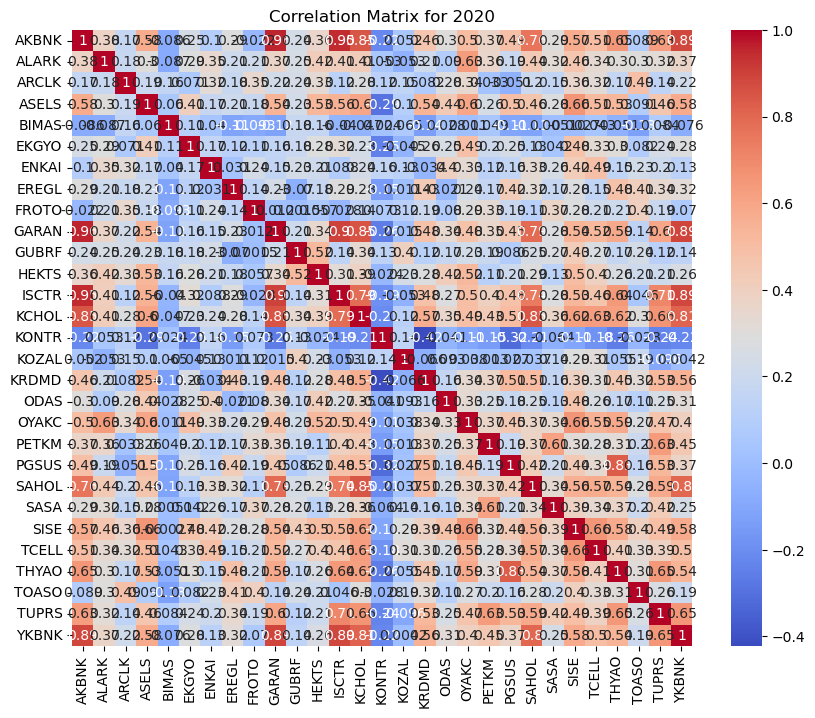

NameError: name 'lowest_corr_stocks' is not defined

In [8]:
#strateji-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns   
import scipy.optimize as sco

# CSV dosyalarının listesini oluşturalım
csv_files = [
    '/Users/fatihbayazit/vscode/YAP471/BIST30/AKBNK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ALARK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ARCLK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ASELS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/BIMAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EKGYO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ENKAI.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EREGL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/FROTO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GARAN.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GUBRF.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/HEKTS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ISCTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KCHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KONTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KOZAL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KRDMD.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ODAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/OYAKC.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PETKM.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PGSUS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SAHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SASA.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SISE.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TCELL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/THYAO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TOASO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TUPRS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/YKBNK.IS.csv'
]

# Her bir CSV dosyasını yükleyip birleştirme işlemi
dataframes = {file.split('/')[-1].split('.')[0]: pd.read_csv(file, index_col='Date', parse_dates=True)['Adj Close'] for file in csv_files}
combined_df = pd.concat(dataframes.values(), axis=1, keys=dataframes.keys())

# Veri çerçevesindeki mevcut yılları kontrol et
available_years = combined_df.index.year.unique()
print("Available years in the dataset:", available_years)

# Portföy optimizasyonu için fonksiyonlar
def portfolio_annualised_performance(weights, returns, cov_matrix):
    returns = np.sum(returns * weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

def neg_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

# Yıl döngüsünü ayarla
start_year = available_years.min() + 1
end_year = available_years.max()

for year in range(start_year, end_year):
    prev_year_data = combined_df[combined_df.index.year == year - 1]
    
    # Önceki yıl için veri kontrolü
    if prev_year_data.empty:
        print(f"No data available for {year - 1}")
        continue

    # Korelasyon matrisi hesaplama
    corr_matrix = prev_year_data.pct_change(fill_method=None).dropna().corr()

    # Korelasyon matrisi geçerlilik kontrolü
    if corr_matrix.isnull().all().all() or corr_matrix.empty:
        print(f"No valid correlations found for {year - 1}")
        continue

    # En düşük korelasyonlu çifti bulma
    corr_flat = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    corr_flat = corr_flat.stack().sort_values()

    if not corr_flat.empty:
        least_corr_stocks = corr_flat.index[0]
        print(f"Least correlated pair for {year - 1} is: {least_corr_stocks}")

        # Korelasyon matrisi çizimi
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title(f"Correlation Matrix for {year - 1}")
        plt.show()
    else:
        print(f"No correlations found for {year - 1}")
        continue
    # Portföy optimizasyonu
    num_assets = len(lowest_corr_stocks)
    args = (returns, cov_matrix, 0.01)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))

    result = minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)

    # Optimize edilmiş portföy için yıllık getiri ve volatilite
    opt_std, opt_return = portfolio_annualised_performance(result.x, returns, cov_matrix)

    # Korelasyon matrisini ve portföy frontier'ini görselleştirme
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for Year {year - 1}')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(opt_std, opt_return, marker='*', color='red')
    plt.title(f'Portfolio Frontier for Year {year}')
    plt.xlabel('Volatility (Std. Deviation)')
    plt.ylabel('Expected Returns')
    plt.show()

Available years in the dataset: Index([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype='int32', name='Date')


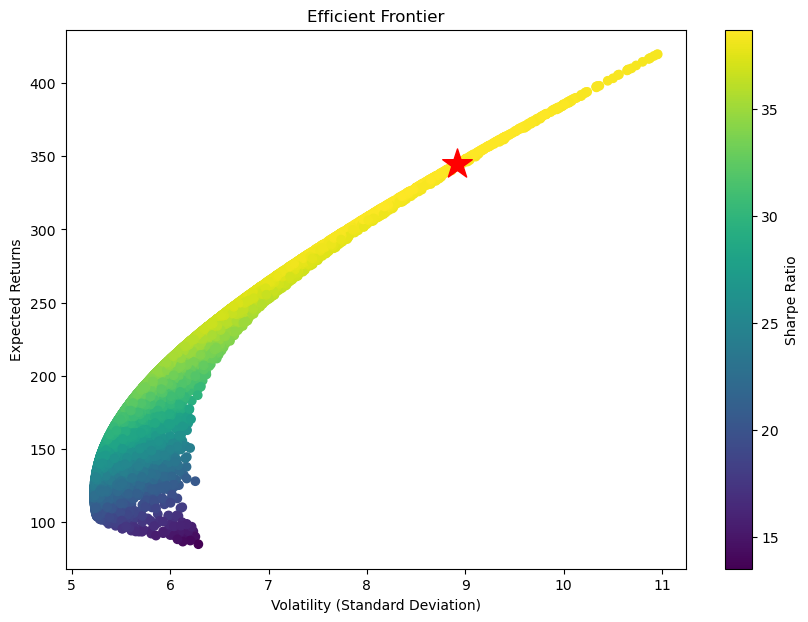

In [9]:
#strateji-9
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns   
import scipy.optimize as sco

# CSV dosyalarının listesini oluşturalım
csv_files = [
    '/Users/fatihbayazit/vscode/YAP471/BIST30/AKBNK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ALARK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ARCLK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ASELS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/BIMAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EKGYO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ENKAI.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EREGL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/FROTO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GARAN.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GUBRF.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/HEKTS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ISCTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KCHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KONTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KOZAL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KRDMD.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ODAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/OYAKC.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PETKM.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PGSUS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SAHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SASA.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SISE.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TCELL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/THYAO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TOASO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TUPRS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/YKBNK.IS.csv'
]

# Her bir CSV dosyasını yükleyip birleştirme işlemi
dataframes = {file.split('/')[-1].split('.')[0]: pd.read_csv(file, index_col='Date', parse_dates=True)['Adj Close'] for file in csv_files}
combined_df = pd.concat(dataframes.values(), axis=1, keys=dataframes.keys())

# Veri çerçevesindeki mevcut yılları kontrol et
available_years = combined_df.index.year.unique()
print("Available years in the dataset:", available_years)

# Portföy optimizasyonu ve frontier grafiği için fonksiyonlar
def portfolio_annualised_performance(weights, returns, cov_matrix):
    returns = np.sum(returns * weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

def neg_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

# Yıllık veri üzerinde döngü
start_year = available_years.min() + 1
end_year = available_years.max()

for year in range(start_year, end_year):
    prev_year_data = combined_df[combined_df.index.year == year - 1]
    corr_matrix = prev_year_data.pct_change().dropna().corr()

    # En düşük korelasyonlu üç hisseyi bul
    corr_unstacked = corr_matrix.unstack()
    sorted_corr = corr_unstacked.sort_values(kind="quicksort")
    
    # En düşük korelasyonlu hisse çiftlerini al (en düşük korelasyon değerlerine sahip)
    lowest_corr_pairs = sorted_corr[sorted_corr != 1][:3]  # 1'den farklı değerleri al (kendi ile olan korelasyonları hariç tut)
    lowest_corr_stocks = [pair[0] for pair in lowest_corr_pairs.index]

    selected_data = combined_df[lowest_corr_stocks]

    # Portföy optimizasyonu
    returns = selected_data.pct_change().mean()
    cov_matrix = selected_data.pct_change().cov()
    num_assets = len(lowest_corr_stocks)
    risk_free_rate = 0.01
    args = (returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))

    result = minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    


# Efficient frontier için simülasyon
def efficient_frontier(returns, cov_matrix, num_portfolios=10000, risk_free_rate=0.01):
    results = np.zeros((3, num_portfolios))
    weights_record = []
    
    for i in range(num_portfolios):
        weights = np.random.random(len(returns))
        weights /= np.sum(weights)
        weights_record.append(weights)
        
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
        
    return results, weights_record

# Simülasyonu çalıştır
num_portfolios = 10000
risk_free_rate = 0.01
returns = selected_data.pct_change().mean() * 252
cov_matrix = selected_data.pct_change().cov() * 252

results, weights = efficient_frontier(returns, cov_matrix, num_portfolios, risk_free_rate)

# Efficient frontier grafiğini çiz
plt.figure(figsize=(10, 7))
plt.scatter(results[0,:], results[1,:], c=(results[1,:] - risk_free_rate) / results[0,:], marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.colorbar(label='Sharpe Ratio')

# En iyi Sharpe oranına sahip portföyü bul ve grafiğe ekleyin
max_sharpe_idx = np.argmax(results[2])
sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
max_sharpe_allocation = weights[max_sharpe_idx]

plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')

plt.show()



Available years in the dataset: Index([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype='int32', name='Date')
   Year            Lowest Correlation Stocks    Return
0  2015  [AKBNK, ALARK, ARCLK, ASELS, BIMAS] -0.007914
1  2016  [AKBNK, ALARK, ARCLK, ASELS, BIMAS]  0.315787
2  2017  [AKBNK, ALARK, ARCLK, ASELS, BIMAS]  0.497887
3  2018  [AKBNK, ALARK, ARCLK, ASELS, BIMAS] -0.186255
4  2019  [AKBNK, ALARK, ARCLK, ASELS, BIMAS]  0.386592
5  2020  [AKBNK, ALARK, ARCLK, ASELS, BIMAS]  0.410125
6  2021  [AKBNK, ALARK, ARCLK, ASELS, BIMAS]  0.252676
7  2022  [AKBNK, ALARK, ARCLK, ASELS, BIMAS]  1.227706
8  2023  [AKBNK, ALARK, ARCLK, ASELS, BIMAS]  0.565436
9  2024  [AKBNK, ALARK, ARCLK, ASELS, BIMAS]  1.002526


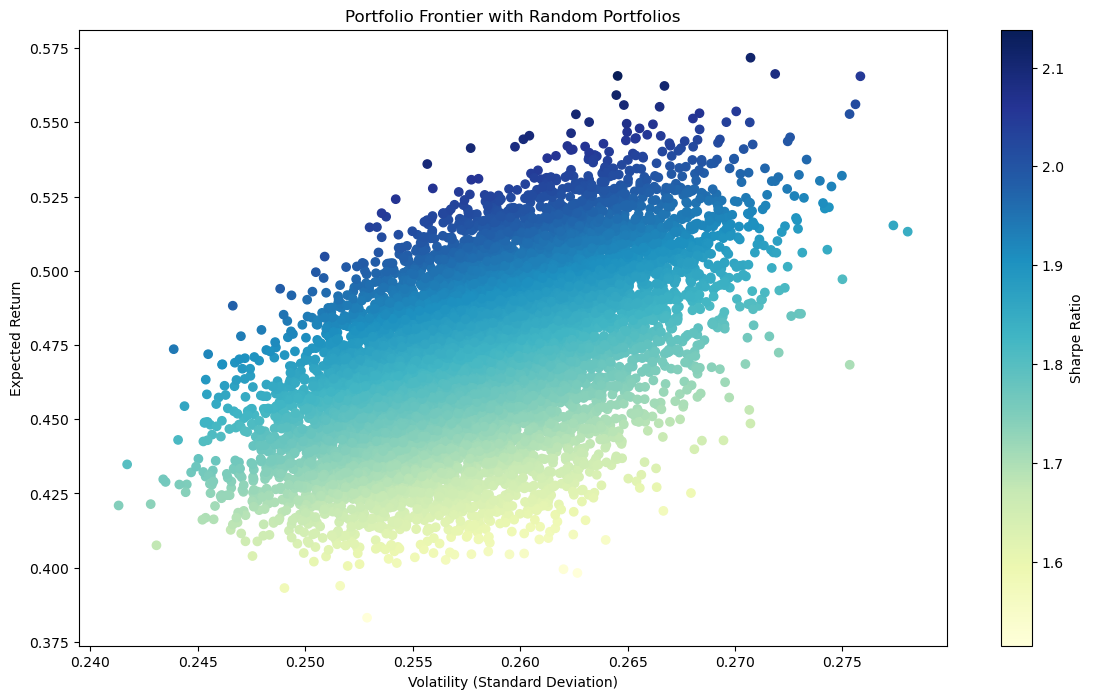

In [10]:
#strateji-10
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns   
import scipy.optimize as sco

# CSV dosyalarının listesini oluşturalım
csv_files = [
    '/Users/fatihbayazit/vscode/YAP471/BIST30/AKBNK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ALARK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ARCLK.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ASELS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/BIMAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EKGYO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ENKAI.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/EREGL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/FROTO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GARAN.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/GUBRF.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/HEKTS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ISCTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KCHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KONTR.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KOZAL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/KRDMD.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/ODAS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/OYAKC.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PETKM.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/PGSUS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SAHOL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SASA.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/SISE.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TCELL.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/THYAO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TOASO.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/TUPRS.IS.csv',
    '/Users/fatihbayazit/vscode/YAP471/BIST30/YKBNK.IS.csv'
]

# Her bir CSV dosyasını yükleyip birleştirme işlemi
dataframes = {file.split('/')[-1].split('.')[0]: pd.read_csv(file, index_col='Date', parse_dates=True)['Adj Close'] for file in csv_files}
combined_df = pd.concat(dataframes.values(), axis=1, keys=dataframes.keys())

# Veri çerçevesindeki mevcut yılları kontrol et
available_years = combined_df.index.year.unique()
print("Available years in the dataset:", available_years)


# Yıllara göre en düşük korelasyonlu 5 hisseyi seçme ve getiri hesaplama
lowest_corr_5_stock_returns = []

for year in corrected_combined_df.index.year.unique():
    if year + 1 in corrected_combined_df.index.year.unique():
        previous_year_data = corrected_combined_df.loc[corrected_combined_df.index.year == year]
        corr_matrix = previous_year_data.pct_change().corr()
        corr_unstacked = corr_matrix.unstack()
        sorted_pairs = corr_unstacked.sort_values(kind="quicksort")
        unique_stocks = pd.Index(sorted_pairs.index.get_level_values(0).union(sorted_pairs.index.get_level_values(1)))
        lowest_corr_stocks = unique_stocks.difference(pd.Index([1])).tolist()[:5]
        
        next_year_data = corrected_combined_df.loc[corrected_combined_df.index.year == year + 1]
        next_year_returns = next_year_data[lowest_corr_stocks].pct_change().mean(axis=1).mean() * 252
        
        lowest_corr_5_stock_returns.append({
            "Year": year + 1,
            "Lowest Correlation Stocks": lowest_corr_stocks,
            "Return": next_year_returns
        })

lowest_corr_5_stock_returns_df = pd.DataFrame(lowest_corr_5_stock_returns)
print(lowest_corr_5_stock_returns_df)

# Portföy optimizasyonu ve frontier çizimi
num_assets = len(corrected_combined_df.columns)
mean_returns = corrected_combined_df.pct_change().mean()
cov_matrix = corrected_combined_df.pct_change().cov()

def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

def minimize_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

num_assets = len(corrected_combined_df.columns)
args = (mean_returns, cov_matrix)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0.0, 1.0) for asset in range(num_assets))  # Her varlık için (0, 1) aralığında sınırlar

def portfolio_variance(weights, mean_returns, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Başlangıç ağırlık vektörü her varlık için eşit ağırlıkta olacak şekilde ayarlanır
initial_guess = num_assets * [1. / num_assets,]

min_result = minimize(portfolio_variance, initial_guess, args=args,
                  method='SLSQP', bounds=bounds, constraints=constraints)
                  

# Rastgele ağırlıklar üretip portföyün beklenen getirisini ve volatilitesini hesaplayan fonksiyonlar
def random_portfolio_weights(num_assets):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    return weights

def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns) * 252
    std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std_dev, returns

# Monte Carlo simülasyonu ile birçok rastgele portföy oluşturma ve performanslarını hesaplama
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
for i in range(num_portfolios):
    weights = random_portfolio_weights(num_assets)
    portfolio_std_dev, portfolio_return = portfolio_performance(weights, mean_returns, cov_matrix)
    results[0,i] = portfolio_std_dev
    results[1,i] = portfolio_return
    # Risk-free rate varsayılan olarak 0 alındı, farklı bir değer kullanmak için değiştirilebilir.
    results[2,i] = (portfolio_return - 0) / portfolio_std_dev

# Sonuçların görselleştirilmesi
plt.figure(figsize=(14, 8))
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Portfolio Frontier with Random Portfolios')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()
